In [1]:
import pandas as pd
import numpy as np
from numpy import NaN

In [2]:
data = pd.DataFrame(
    np.arange(12).reshape(3, 4),
    columns=['A', 'B', 'C', 'D']
)
data.D[2] = 'NaN'
data

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,NaN


In [3]:
data.drop(['D'], axis=1)

,A,B,C
0,0,1,2
1,4,5,6
2,8,9,10


In [4]:
# NaN은 numpy에서 NaN을 가지고 와야 함
robots = [[24, 23680], [35, NaN], [46, 47350], [27, NaN]]
print(robots)

[[24, 23680], [35, nan], [46, 47350], [27, nan]]


In [5]:
robots = [[24, 23680], [35, NaN], [46, 47350], [27, NaN]]
data = pd.DataFrame(robots, columns=['max_speed', 'price'])
print(data)

   max_speed    price
0         24  23680.0
1         35      NaN
2         46  47350.0
3         27      NaN


In [6]:
# NaN이 들어 있는 행 삭제
data.dropna(subset=['price'], axis=0, inplace=True)
print(data)

   max_speed    price
0         24  23680.0
2         46  47350.0


In [7]:
robots = [[24, 23680], [35, NaN], [46, 47350], [27, NaN]]
data = pd.DataFrame(robots, columns=['max_speed', 'price'])
mean = data['price'].mean()
data.replace(NaN, mean)
print(data)

   max_speed    price
0         24  23680.0
1         35      NaN
2         46  47350.0
3         27      NaN


In [8]:
data = data.replace(NaN, mean)
data

,max_speed,price
0,24,23680.0
1,35,35515.0
2,46,47350.0
3,27,35515.0


In [9]:
"""
단순히 data.replace(NaN, mean)을 수행한 것은
데이터를 수정한 것이 아님
실제 데이터를 수정하려면 inplace 옵션을 설정해야 함
"""
data.replace(NaN, mean, inplace=True)
data

,max_speed,price
0,24,23680.0
1,35,35515.0
2,46,47350.0
3,27,35515.0


#### Binning & Normalization
  * Binning: 다수의 bin으로 그룹화. 일반적으로 숫자 크기별로 종류 구분 → 특정 값들의 집합을 해당 bin에 할당


In [10]:
import matplotlib.pyplot as plt
import numpy as np

(array([0.   , 0.   , 0.   , 0.   , 0.01 , 0.02 , 0.11 , 0.212, 0.3  ,
        0.356, 0.378, 0.274, 0.212, 0.086, 0.034, 0.008, 0.   , 0.   ,
        0.   , 0.   ]),
 array([-5. , -4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,
         0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ]),
 <BarContainer object of 20 artists>)

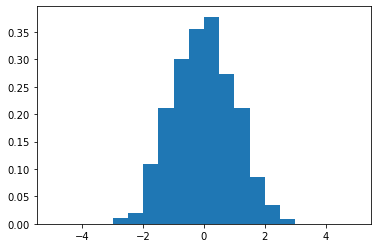

In [11]:
x = np.random.randn(1000)
plt.hist(x, density=True, bins=np.linspace(-5, 5, 21))

* Normalization: 선형회귀(linear regression) 사용 시 2개 속성 간 범위의 격차가 너무 클 때 입력 데이터(feature)의 범위를 조절하는 스케일(scale) 기능 적용

* Data Formatting

In [12]:
import numpy as np
import pandas as pd
price = np.random.randint(100, size=8) * 10000
cars = pd.DataFrame(price, columns=['price'])
cars

,price
0,870000
1,80000
2,870000
3,480000
4,110000
5,550000
6,290000
7,730000


In [13]:
group_names = ['저급', '중급', '고급']
cars['Level'], mybin = pd.cut(cars['price'], 3, labels=group_names, retbins=True)
cars

"""
cut() 사용 시 ['price'] 참조하여 '저급', '중급', '고급' 중 해당 가격 선택
"""

"\ncut() 사용 시 ['price'] 참조하여 '저급', '중급', '고급' 중 해당 가격 선택\n"

In [14]:
cars['Level'] = pd.cut(cars['price'], 3, labels=group_names)
"""
car 데이터프레임의 'price' 컬럼을 참조하여 'group_names'에 명시된 카테고리명으로 3개이 bin을 만들어 분류한 후
car 데이터프레임의 ['Level'] 컬럼으로 새로 추가하라는 뜻
"""
cars

,price,Level
0,870000,고급
1,80000,저급
2,870000,고급
3,480000,중급
4,110000,저급
5,550000,중급
6,290000,저급
7,730000,고급


In [15]:
cars['Level'], mybin = pd.cut(cars['price'], 3, labels=group_names, retbins=True)
print(cars)
print(mybin)

    price Level
0  870000    고급
1   80000    저급
2  870000    고급
3  480000    중급
4  110000    저급
5  550000    중급
6  290000    저급
7  730000    고급
[ 79210.         343333.33333333 606666.66666667 870000.        ]


In [16]:
ary = [[1, 1.1, '손'], [2, 2.2, '날개'], [3, 3.3, '손']]
data = pd.DataFrame(ary, columns=['수온', '상온', 'hand'])
pd.get_dummies(data['hand'])

,날개,손
0,0,1
1,1,0
2,0,1


In [17]:
ary = [[1, 1.1, '손'], [2, 2.2, '날개'], [3, 3.3, '손']]
data = pd.DataFrame(ary, columns=['수온', '상온', 'hand'])
data = pd.concat([data, pd.get_dummies(data['hand'])], axis=1, sort=False)
data

,수온,상온,hand,날개,손
0,1,1.1,손,0,1
1,2,2.2,날개,1,0
2,3,3.3,손,0,1


In [18]:
ary = [[1, 1.1, '손'], [2, 2.2, '날개'], [3, 3.3, '손']]
data = pd.DataFrame(ary, columns=['수온', '상온', 'hand'])
data = pd.concat([data, pd.get_dummies(data['hand'])], axis=1, sort=False)
data.drop(['hand'], axis=1, inplace=True)
data

,수온,상온,날개,손
0,1,1.1,0,1
1,2,2.2,1,0
2,3,3.3,0,1
